In [1]:
import pandas as pd
import numpy as np
import pyodbc
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [2]:
# Leemos el archivo csv
df_csv = pd.read_csv('informacion_personal.csv')

In [3]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   CustomerId   10000 non-null  int64 
 2   Surname      10000 non-null  object
 3   Name         10000 non-null  object
 4   Email        10000 non-null  object
 5   CreditScore  10000 non-null  int64 
 6   Geography    10000 non-null  object
 7   Gender       10000 non-null  object
 8   Age          10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 703.3+ KB


In [4]:
df_csv.head(5)

Unnamed: 0  CustomerId   Surname         Name                     Email  \
0           0    15634602  Hargrave  Christopher   mataantonio@example.net   
1           1    15647311      Hill    Stephanie    jamesbaker@example.net   
2           2    15619304      Onio        Julie     kathryn47@example.org   
3           3    15701354      Boni     Jennifer  philipmurphy@example.com   
4           4    15737888  Mitchell       Hailey     xmorrison@example.org   

   CreditScore Geography  Gender  Age  
0          619    France  Female   42  
1          608     Spain  Female   41  
2          502    France  Female   42  
3          699    France  Female   39  
4          850     Spain  Female   43

In [5]:
# Se elimina la primera columna que contenía los índices de cada fila del archivo csv
df_csv = df_csv.drop('Unnamed: 0', axis=1)

In [6]:
# Conexión a BD SQL

# Datos de conexión
server = 'U-JM15VC3\SQLEXPRESS'
bd = 'Bancaria'
usuario = 'sa'
contrasena = '12345678'

# Crear conexión a la base de datos
conexion = pyodbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+bd+';UID='+usuario+';PWD='+contrasena)
print('Conexión exitosa')

# Ejecutar una consulta y almacena en un dataframe
query = "SELECT * FROM dbo.data_bancaria"
df_bd = pd.read_sql(query, conexion)
df_bd.head()

Conexión exitosa


Column 0 CustomerId Tenure    Balance NumOfProducts HasCrCard  \
0        0   15634602      2        0.0             1         1   
1        1   15647311      1   83807.86             1         0   
2        2   15619304      8   159660.8             3         1   
3        3   15701354      1        0.0             2         0   
4        4   15737888      2  125510.82             1         1   

  IsActiveMember EstimatedSalary Exited  
0              1       101348.88      1  
1              1       112542.58      0  
2              0       113931.57      1  
3              0        93826.63      0  
4              1         79084.1      0

In [7]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Column 0         10000 non-null  object
 1   CustomerId       10000 non-null  object
 2   Tenure           10000 non-null  object
 3   Balance          10000 non-null  object
 4   NumOfProducts    10000 non-null  object
 5   HasCrCard        10000 non-null  object
 6   IsActiveMember   10000 non-null  object
 7   EstimatedSalary  10000 non-null  object
 8   Exited           10000 non-null  object
dtypes: object(9)
memory usage: 703.3+ KB


In [8]:
# Se elimina la primera columna que contenía los índices de cada fila
df_bd = df_bd.drop('Column 0', axis=1)

In [9]:
#df_data = pd.merge(df_csv, df_bd, on='CustomerId')
col_int = ['CustomerId','Tenure','NumOfProducts','HasCrCard','IsActiveMember', 'Exited']
col_float = ['Balance','EstimatedSalary']

df_bd[col_int] = df_bd[col_int].astype(int)
df_bd[col_float] = df_bd[col_float].astype(float)
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int32  
 1   Tenure           10000 non-null  int32  
 2   Balance          10000 non-null  float64
 3   NumOfProducts    10000 non-null  int32  
 4   HasCrCard        10000 non-null  int32  
 5   IsActiveMember   10000 non-null  int32  
 6   EstimatedSalary  10000 non-null  float64
 7   Exited           10000 non-null  int32  
dtypes: float64(2), int32(6)
memory usage: 390.8 KB


#### Unión de los dos DataFrame - Archivo csv y BD

In [10]:
df_data = pd.merge(df_csv, df_bd, on='CustomerId')
df_data.sample(20)

CustomerId     Surname      Name                       Email  \
8016    15759555      Murphy   Michael       peterpena@example.com   
8322    15584899   Siciliani   Loretta  robertcrawford@example.net   
6727    15610416    Christie    Brandi   petersenlaura@example.net   
8113    15752193      Burton      Lori       lisabruce@example.net   
5497    15710421      Baresi       Tom           mruiz@example.com   
5031    15680517         Sal     Raven           gford@example.net   
1611    15781553       Chung    Bonnie         james76@example.net   
2910    15746139      Enemuo      Leah           rpope@example.net   
9604    15687363    McMillan     Paula    delgadodavid@example.com   
8339    15658100      Piccio   Jeffrey        joseph51@example.org   
7169    15684722      Fraser     Derek    reginaldross@example.com   
3722    15807961       Bruno    Andrew      romanjesse@example.com   
777     15628936      Archer   Gabriel        janice06@example.com   
3027    15792102   Yefremova     Carol     jimmyharris@example.org   
3039    15666141     Baldwin    Steven      jamesevans@example.com   
7082    15667451      Taylor     Jason        daniel61@example.org   
6061    15758023  Grigoryeva   Michael     whiteashley@example.net   
393     15684548     Demidov  Jonathan         xjensen@example.com   
967     15720893     Gilbert      Cody   lauralawrence@example.org   
7686    15675450        Burt    Dennis    barbarabrown@example.com   

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8016          569     Spain    Male   41       2       0.00              2   
8322          617    France  Female   35       5       0.00              2   
6727          745    France  Female   36       9       0.00              1   
8113          421     Spain    Male   34       6   90723.36              1   
5497          774     Spain  Female   36       8  117152.30              1   
5031          769   Germany  Female   34       7  137239.17              1   
1611          760   Germany  Female   49       9   91502.99              1   
2910          596    France    Male   33       2  139451.67              1   
9604          770    France    Male   31       3  155047.56              2   
8339          695    France  Female   42       0       0.00              2   
7169          490    France    Male   34       5  122952.90              2   
3722          619    France    Male   25       4       0.00              1   
777           692     Spain    Male   28       9  118945.09              1   
3027          774    France  Female   42       3  137781.65              1   
3039          829     Spain  Female   26       8  101440.36              2   
7082          733    France    Male   36       5       0.00              2   
6061          544   Germany    Male   47       5  105245.21              1   
393           556     Spain    Male   38       8       0.00              2   
967           637     Spain  Female   34       9       0.00              2   
7686          718    France    Male   48       9       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
8016          1               0        134272.57       0  
8322          0               1         13066.30       0  
6727          1               0         19605.18       1  
8113          1               1         12162.76       0  
5497          0               0        101828.39       0  
5031          1               1         71379.92       1  
1611          1               0        117232.90       1  
2910          0               0         63142.12       0  
9604          1               1        186064.34       0  
8339          0               1        140724.64       0  
7169          0               0        154360.97       0  
3722          1               0        145524.36       0  
777           0               0         16064.25       1  
3027          0               0        199316.19       0  
3039       

In [11]:
df_data.shape

(10000, 15)

In [12]:
df_dataf =df_data.copy()

In [13]:
df_dataf.head(5)

CustomerId   Surname         Name                     Email  CreditScore  \
0    15634602  Hargrave  Christopher   mataantonio@example.net          619   
1    15647311      Hill    Stephanie    jamesbaker@example.net          608   
2    15619304      Onio        Julie     kathryn47@example.org          502   
3    15701354      Boni     Jennifer  philipmurphy@example.com          699   
4    15737888  Mitchell       Hailey     xmorrison@example.org          850   

  Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0    France  Female   42       2       0.00              1          1   
1     Spain  Female   41       1   83807.86              1          0   
2    France  Female   42       8  159660.80              3          1   
3    France  Female   39       1       0.00              2          0   
4     Spain  Female   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

In [16]:
# -- Función para convertir de euro a dólares
def convertir_dolar(salario):
    valor = salario * 1.09
    return valor

In [17]:
# -- Función para convertir la edad en año de nacimiento
import datetime
def calcular_anio_nacimiento(edad):
    anio_actual = datetime.datetime.now().year
    return anio_actual - edad

In [18]:
# -- Función para categorizar los tipos de generaciones conforme al año de nacimiento
def generaciones(anio):
    if anio >= 1928 and anio <= 1945:
        return "Generacion silenciosa"
    elif anio >= 1946 and anio <= 1964:
        return "Baby Boomers"
    elif anio >= 1965 and anio <= 1980:
        return "Generacion X"
    elif anio >= 1981 and anio <= 1996:
        return "Millennials"
    elif anio >= 1997 and anio <= 2012:
        return "Generacion Z"
    else:
        return "Generación Futura"

In [19]:
# Función que toma la inicial de cada palabra
def obtener_inicial(d):
    cadena = d[0]
    return cadena

In [20]:
# Función para clasificar los años de permanencia del cliente con el banco
def clasification_tenure(num_anios):
    if num_anios >= 0 and num_anios <= 1:
        return "Nuevos"
    elif num_anios > 1 and num_anios <= 5:
        return "Regulares"
    elif num_anios > 5 and num_anios <= 9:
        return "Leales"
    else:
        return "Muy leales"

#### Inserción de columnas

In [21]:
df_dataf['SalaryDolar'] = df_dataf['EstimatedSalary'].apply(convertir_dolar)
df_dataf['AnioNacimiento'] = df_dataf['Age'].apply(calcular_anio_nacimiento)
df_dataf['Generaciones'] = df_dataf['AnioNacimiento'].apply(generaciones)
df_dataf['InicialGender'] = df_dataf['Gender'].apply(obtener_inicial)
df_dataf['Fidelidad'] = df_dataf['Tenure'].apply(clasification_tenure)

In [22]:
df_dataf.sample(10)

CustomerId     Surname       Name                       Email  \
4869    15781272       Coles      Tammy    mariamontoya@example.com   
8623    15666197        Boni      Jason          iterry@example.org   
9967    15603794    Pugliesi   Jennifer           sgray@example.org   
5006    15750014     Chikere     Nicole        uhampton@example.com   
3537    15632324      Pisani  Katherine  jasonsingleton@example.net   
7502    15697844  Whitehouse       Lisa        ostewart@example.org   
3903    15678129        Hill      Erika    jamiesanchez@example.com   
9542    15621140     Nwebube     Joseph      jonathan33@example.net   
1835    15583718       Terry      Bryan   thomasgoodwin@example.net   
8264    15710111       Clark   Jennifer      smithmaria@example.org   

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
4869          669    France    Male   50       4  149713.61              3   
8623          430   Germany  Female   38       8  153058.64              1   
9967          623    France    Male   48       5  118469.38              1   
5006          755   Germany  Female   37       0  113865.23              2   
3537          602    France    Male   59       7       0.00              2   
7502          721     Spain  Female   32      10       0.00              1   
3903          643     Spain  Female   45       9  150840.03              2   
9542          644     Spain    Male   37       9       0.00              2   
1835          696   Germany    Male   38       6  142316.14              1   
8264          742    France    Male   33       6       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  SalaryDolar  \
4869          1               1        124872.42       1  136110.9378   
8623          1               0         99377.27       0  108321.2243   
9967          1               1        158590.25       0  172863.3725   
5006          1               1        117396.25       0  127961.9125   
3537          1               1        162347.05       0  176958.2845   
7502          1               0        136119.96       1  148370.7564   
3903          1               0        155516.35       0  169512.8215   
9542          1               1         96442.86       0  105122.7174   
1835          1               1          8018.49       0    8740.1541   
8264          0               0         38550.40       0   42019.9360   

      AnioNacimiento  Generaciones InicialGender   Fidelidad  
4869            1974  Generacion X             M   Regulares  
8623            1986   Millennials             F      Leales  
9967            1976  Generacion X             M   Regulares  
5006            1987   Millennials             F      Nuevos  
3537            1965  Generacion X             M      Leales  
7502            1992   Millennials             F  Muy leales  
3903            1979  Generacion X             F      Leales  
9542            1987   Millennials             M      Leales  
1835            1986   Millennials             M      Leales  
8264            1991   Millennials             M      Leales

#### Columnas insertadas en base al dataset
 - SalaryDolar: almacena la conversión de "EstimatedSalary" a dólares
 - AnioNacimiento: año de nacimiento en función de la edad del cliente
 - Generaciones: contiene la clasificiación de las generaciones actuales conforme al año de nacimiento "AnioNacimiento"
 - Inicial_Gender: Imprime la letra inicial en mayúscula de la columan género
 - Fidelidad: Muestra de forma categórica si el cliente es nuevo, regular, leal muy leal conforme a sus años de permanencia con el banco

In [22]:
df_dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   Name             10000 non-null  object 
 3   Email            10000 non-null  object 
 4   CreditScore      10000 non-null  int64  
 5   Geography        10000 non-null  object 
 6   Gender           10000 non-null  object 
 7   Age              10000 non-null  int64  
 8   Tenure           10000 non-null  int32  
 9   Balance          10000 non-null  float64
 10  NumOfProducts    10000 non-null  int32  
 11  HasCrCard        10000 non-null  int32  
 12  IsActiveMember   10000 non-null  int32  
 13  EstimatedSalary  10000 non-null  float64
 14  Exited           10000 non-null  int32  
 15  SalaryDolar      10000 non-null  float64
 16  AnioNacimiento   10000 non-null  int64  
 17  Generaciones 

### Visualizaciones en el Dataset

#### Gráficas con Matplotlib

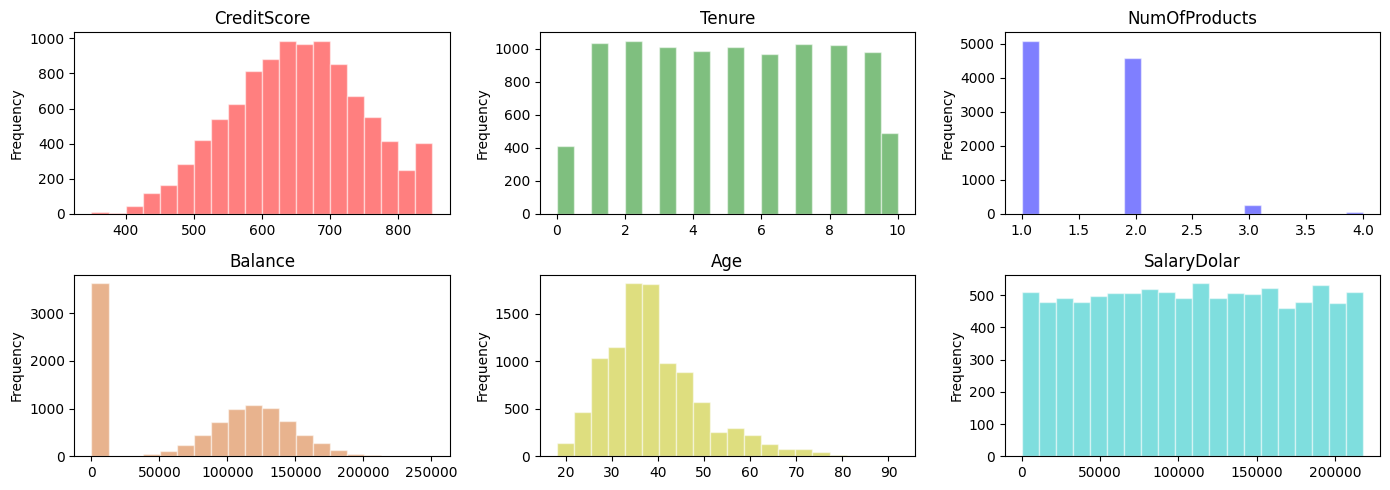

In [23]:
# Representación gráfica de varibles numéricas - Tabla de frecuencia
# Crear subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 5))

# Graficar cada columna en un subplot diferente
df_dataf['CreditScore'].plot.hist(ax=axs[0, 0], color='r', title='CreditScore', alpha=0.5, bins = 20, edgecolor = "white")
df_dataf['Tenure'].plot.hist(ax=axs[0, 1], color='g', title='Tenure', alpha=0.5, bins = 20, edgecolor = "white")
df_dataf['NumOfProducts'].plot.hist(ax=axs[0, 2], color='b', title='NumOfProducts', alpha=0.5, bins = 20, edgecolor = "white")
df_dataf['Balance'].plot.hist(ax=axs[1, 0], color='#D2691E', title='Balance', alpha=0.5, bins = 20, edgecolor = "white")
df_dataf['Age'].plot.hist(ax=axs[1, 1], color='y', title='Age', alpha=0.5, bins = 20, edgecolor = "white")
df_dataf['SalaryDolar'].plot.hist(ax=axs[1, 2], color='#00BFBF', title='SalaryDolar', alpha=0.5, bins = 20, edgecolor = "white")

# Ajustar el espaciado entre subplots
plt.tight_layout()
# Mostrar la gráfica
plt.show()

In [24]:
# Contar la frecuencia de cada categoría
Geography_counts = df_dataf['Geography'].value_counts()
Gender_counts = df_dataf['Gender'].value_counts()
#Geography_counts = df_dataf['Geography'].value_counts()
#Fidelidad_counts = df_dataf['Fidelidad'].value_counts()

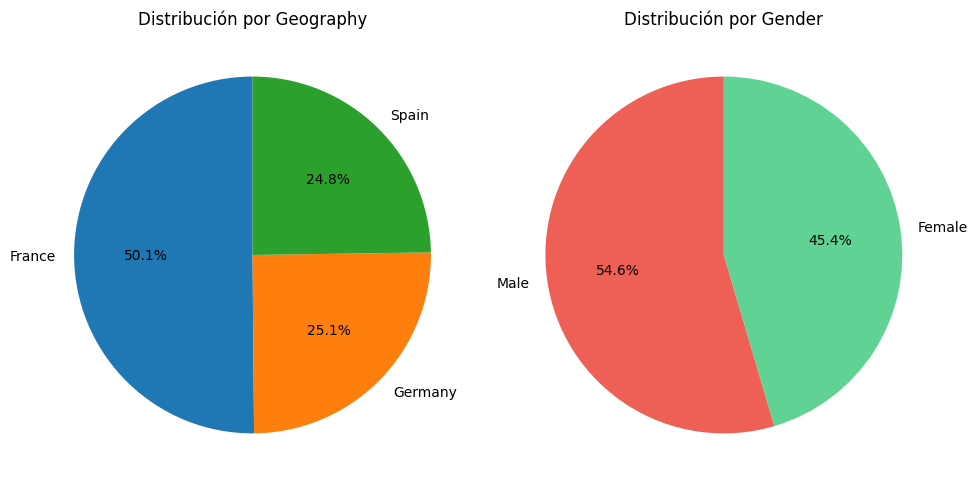

In [27]:
# Gráfica de pastel de "Geography" y "Gender"
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Gráfica de pastel para la categoría 'Geography'
axs[0].pie(Geography_counts, labels=Geography_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribución por Geography')

# Gráfica de pastel para la categoría 'Gender'
colores = ["#EE6055","#60D394"]
axs[1].pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colores)
axs[1].set_title('Distribución por Gender')

plt.tight_layout()  # Ajustar el layout para que no se solapen las subplots
plt.show()

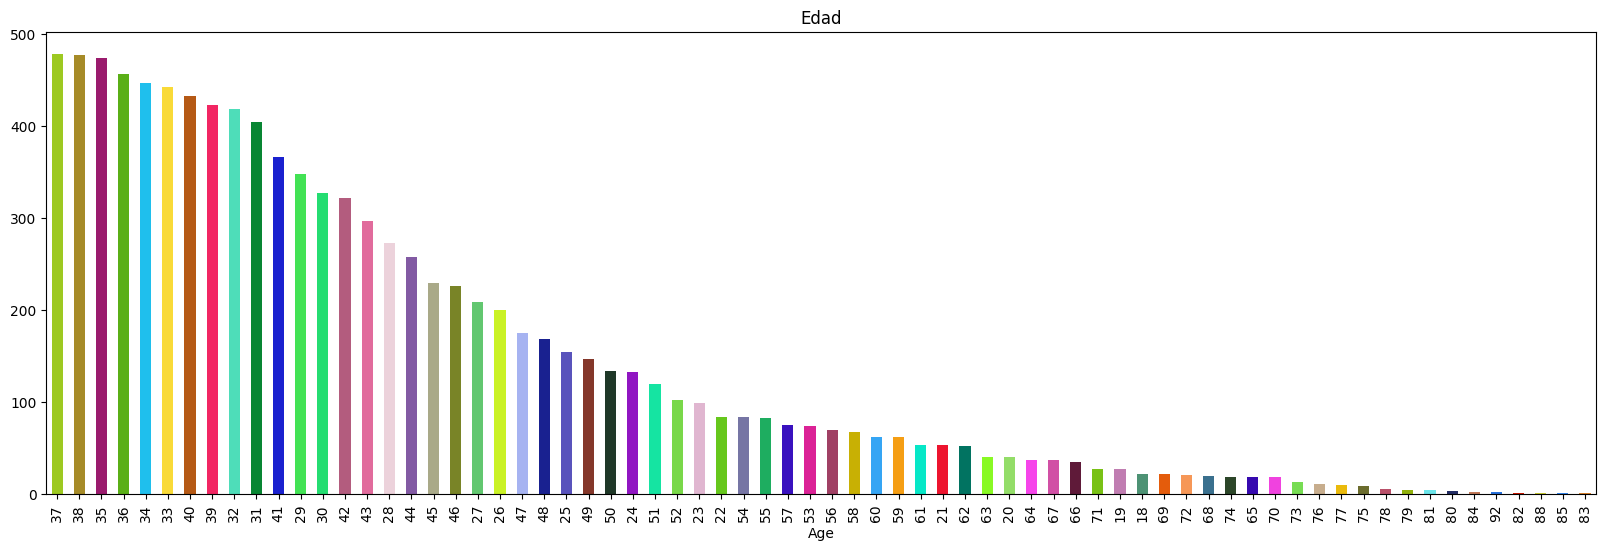

In [28]:
# Gráfica de la frecuencia de las edades
colores = np.random.rand(len(df_dataf["Age"].value_counts()), 3)
df_dataf["Age"].value_counts().plot.bar(figsize=(20,6), color=colores)
plt.title('Edad')
plt.show()

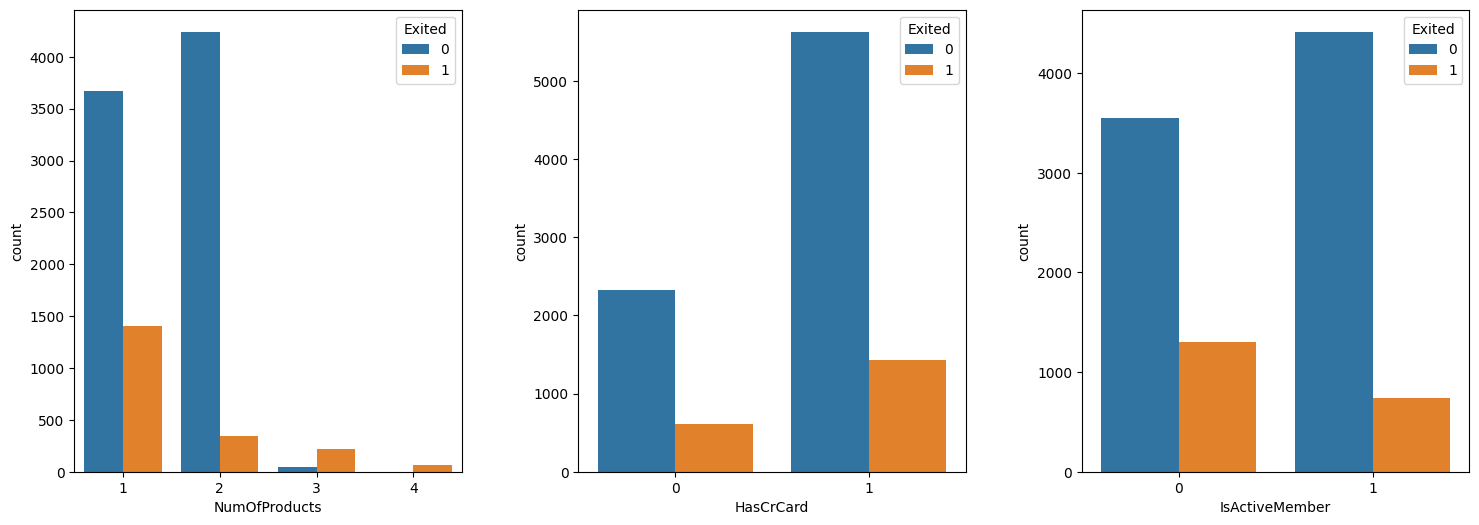

In [42]:
# Gráfica del abandono de clientes en función de (NumOfProducts, )
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df_dataf, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df_dataf, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df_dataf, ax = ax[2])
plt.show()

#### Gráficas con Bokeh

In [138]:
from bokeh.io import curdoc
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
#from bokeh.io import export_png

output_notebook()

# Se crea un nuevo gráfico con el título y los ejes
p = figure(title="Age vs Balance", x_axis_label="Age", y_axis_label="Balance")
curdoc().theme = "dark_minimal"

# add circle renderer with additional arguments
p.scatter(
    df_dataf['Age'],
    df_dataf['Balance'],
    marker="circle",
    size=5,
    legend_label="Objetos",
    fill_color="blue",
    fill_alpha=0.5,
    line_color="red",
)

# mostrar los resultados
show(p)

Loading BokehJS ...

In [139]:
output_notebook()

# Se crea un nuevo gráfico con el título y los ejes
p = figure(title="Age vs CreditScore", x_axis_label="Age", y_axis_label="CreditScore")
curdoc().theme = "light_minimal" # tipo de gráfica

# Círculos con argumentos adicionales
p.scatter(
    df_dataf['Age'],
    df_dataf['CreditScore'],
    marker="circle",
    size=5,
    legend_label="Objetos",
    fill_color="blue",
    fill_alpha=0.5,
    line_color="red",
)

# mostrar los resultados
show(p)

Loading BokehJS ...

In [124]:
# Contar la frecuencia de cada categoría
Generaciones_counts = df_dataf['Generaciones'].value_counts()

# Preparar los datos para Bokeh
data = pd.DataFrame(Generaciones_counts).reset_index()
data.columns = ['Generaciones', 'Cantidad']
data.head(5) # Se genera un dataframe con la frecuencia de "Generaciones"

Generaciones  Cantidad
0            Millennials      6383
1           Generacion X      2071
2           Generacion Z      1020
3           Baby Boomers       507
4  Generacion silenciosa        19

In [140]:
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource

# Crear una fuente de datos para Bokeh
source = ColumnDataSource(data)
print(source)

ColumnDataSource(id='p4925', ...)


In [144]:
# Se crea la gráfica de barras
output_notebook()
p = figure(x_range=data['Generaciones'], outer_width=800, min_width=1000, title="Cantidad de Elementos por Generaciones",
           toolbar_location=None, tools="")

# Añadir las barras
p.vbar(x='Generaciones', top='Cantidad', width=0.9, source=source, legend_field="Generaciones",
       line_color='white', fill_color=factor_cmap('Generaciones', palette=Spectral6, factors=data['Generaciones']))

# Configurar el aspecto de la gráfica
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = 'Generaciones'
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# Mostrar la gráfica
show(p)

Loading BokehJS ...

#### Gráficas con Pywalker

In [23]:
import pygwalker as pyg

In [25]:
pyg.walk(df_dataf)

Box(children=(HTML(value='<div id="ifr-pyg-0006190a104299e691fH8Zn4YNWtvICy" style="height: auto">\n    <head>…

In [27]:
pyg.walk(df_dataf)

Box(children=(HTML(value='<div id="ifr-pyg-0006190a3b3d6ba43MBstc1bxqJeVQDz" style="height: auto">\n    <head>…